In [11]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_biv import violinbox_solution_1

We'll continue to make use of the fuel economy dataset in this workspace.

In [12]:
fuel_econ = pd.read_csv('./dataset/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task**: What is the relationship between the size of a car and the size of its engine? The cars in this dataset are categorized into one of five different vehicle classes based on size. Starting from the smallest, they are: {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, and Large Cars}. The vehicle classes can be found in the 'VClass' variable, while the engine sizes are in the 'displ' column (in liters). **Hint**: Make sure that the order of vehicle classes makes sense in your plot!

In [13]:
# YOUR CODE HERE
data = fuel_econ[['VClass','displ']]

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

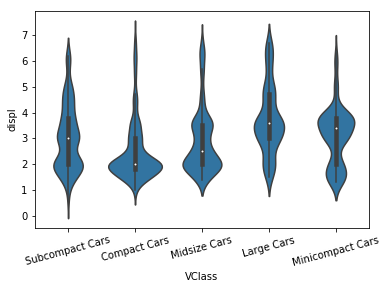

In [14]:
base_color = sb.color_palette()[0]
sb.violinplot(data = data, x = 'VClass', y = 'displ', color = base_color)
plt.xticks(rotation = 15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

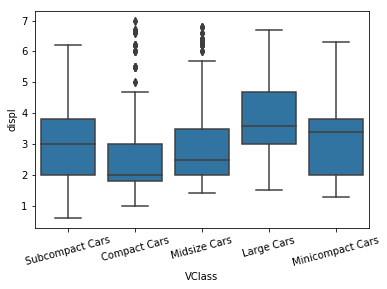

In [15]:
sb.boxplot(data = data, x = 'VClass', y = 'displ', color = base_color)
plt.xticks(rotation = 15)

['0', '23', '4']


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

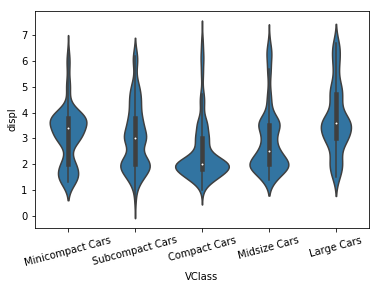

In [17]:

sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
pd_ver = pd.__version__.split(".")
print(pd_ver)
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
    fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
#     print(fuel_econ['VClass'])

else: # pre-v0.21
    fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True, categories = sedan_classes)
#     print(fuel_econ['VClass'])
data = fuel_econ[['VClass','displ']]    
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'displ', color = base_color)
plt.xticks(rotation = 15)

I used a violin plot to depict the data in this case; you might have chosen a box plot instead. One of the interesting things about the relationship between variables is that it isn't consistent. Compact cars tend to have smaller engine sizes than the minicompact and subcompact cars, even though those two vehicle sizes are smaller. The box plot would make it easier to see that the median displacement for the two smallest vehicle classes is greater than the third quartile of the compact car class.


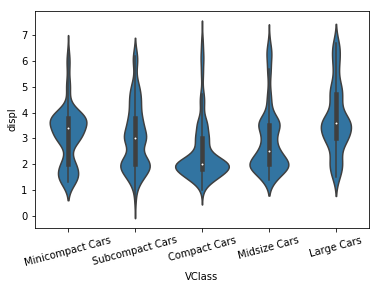

In [7]:
# run this cell to check your work against ours
violinbox_solution_1()